## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
df = pd.read_excel('Data_Pathrise.xlsx')

### Data Cleaning

#### Getting the number of rows and columns in the data

In [3]:
df.shape

(2544, 16)

We have 16 colummns in our dataset and 2544 number of rows.

In [4]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


#### Get the column data type

In [5]:
# Getting column type of the data
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

#### Get percentage of na and null in each column

In [6]:
round(df.isna().mean(),4)*100

id                              0.00
pathrise_status                 0.00
primary_track                   0.00
cohort_tag                      0.31
program_duration_days          24.21
placed                          0.00
employment_status               9.00
highest_level_of_education      2.28
length_of_job_search            2.91
biggest_challenge_in_search     0.94
professional_experience         8.73
work_authorization_status      11.16
number_of_interviews            8.57
number_of_applications          0.00
gender                         19.34
race                            0.71
dtype: float64

Looks like there are some missing values. Since some of the columns are returning non zero value.

Since it's not feasible removing each row containing NAN as it will lead to loss of data. For the NA in Quantitative columns we will replace them by the mean of the whole column. And will drop the rows containing NA for column with categorical values.

In [7]:
# Need to drop rows containing NA for Categorical data
df = df[df['employment_status '].notna()]
df = df[df['highest_level_of_education'].notna()]
df = df[df['length_of_job_search'].notna()]
df = df[df['gender'].notna()]
df = df[df['race'].notna()]
df = df[df['work_authorization_status'].notna()]
df = df[df['biggest_challenge_in_search'].notna()]
df = df[df['cohort_tag'].notna()]
df = df[df['professional_experience'].notna()]

In [8]:
# Replacing the NA values with mean of the whole column for Quantitative data
df.fillna(df.mean(), inplace = True)

In [9]:
df.isnull().values.any()

False

False indicates that there is no NA values in our dataframe.

### Viewing Basic Statistics about our Data

In [10]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1106.138889,131.228281,0.377778,2.243921,38.238889
std,719.046476,108.562016,0.485000,2.910371,53.013679
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,486.750000,37.000000,0.000000,0.000000,9.000000
50%,1043.500000,131.228281,0.000000,2.000000,20.000000
75%,1698.250000,173.000000,1.000000,3.000000,50.000000
max,2544.000000,548.000000,1.000000,20.000000,900.000000


## EDA

**Analysis of Target Variable**

0    896
1    544
Name: placed, dtype: int64


/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


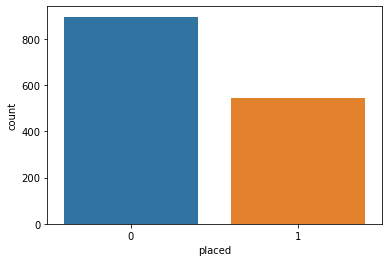

In [11]:
print(df['placed'].value_counts())
sns.countplot(df['placed'])
plt.show()

We can see that there is an imbalance in our dataframe as we have more number of 0 than 1. This is not a good thign cause that means that our target variable is imabalance. 

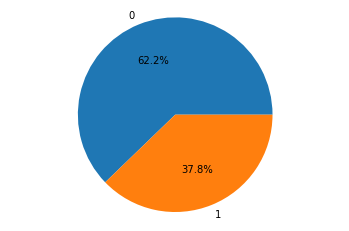

In [59]:
data = df['placed'].value_counts()
labels = ['0', '1']
size = [data[0], data[1]]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels, autopct = '%1.1f%%')
ax1.axis('equal')
plt.show()

Out of total Placed values, 0 appears 62.2% of times and 1 appears 37.8% of times.

#### Analyzing Time taken for Placement by Primary Track

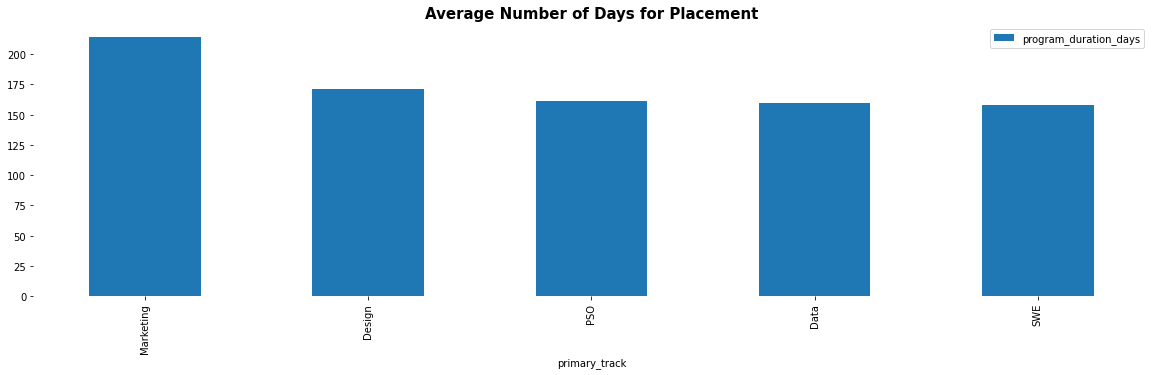

In [60]:
df_1 = df[df['pathrise_status'] == 'Placed']
df_loc = df_1.groupby('primary_track').agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False) 
df_loc.plot(kind='bar',figsize=(20,5))
plt.box(False)
plt.title ('Average Number of Days for Placement', fontsize=15, fontweight="bold")
plt.show()

Can primary track have a significant impact on the number of days taken for placement. By looking at the graph we can say employees with ***Marketing*** has a significant number of higher program duration days. For the graph we have only taken the data points where the pathrise_status is Placed for better understanding. 

### Understading Categorical Columns wrt Placement Days

Understanding the Categorical Distributions By the Target


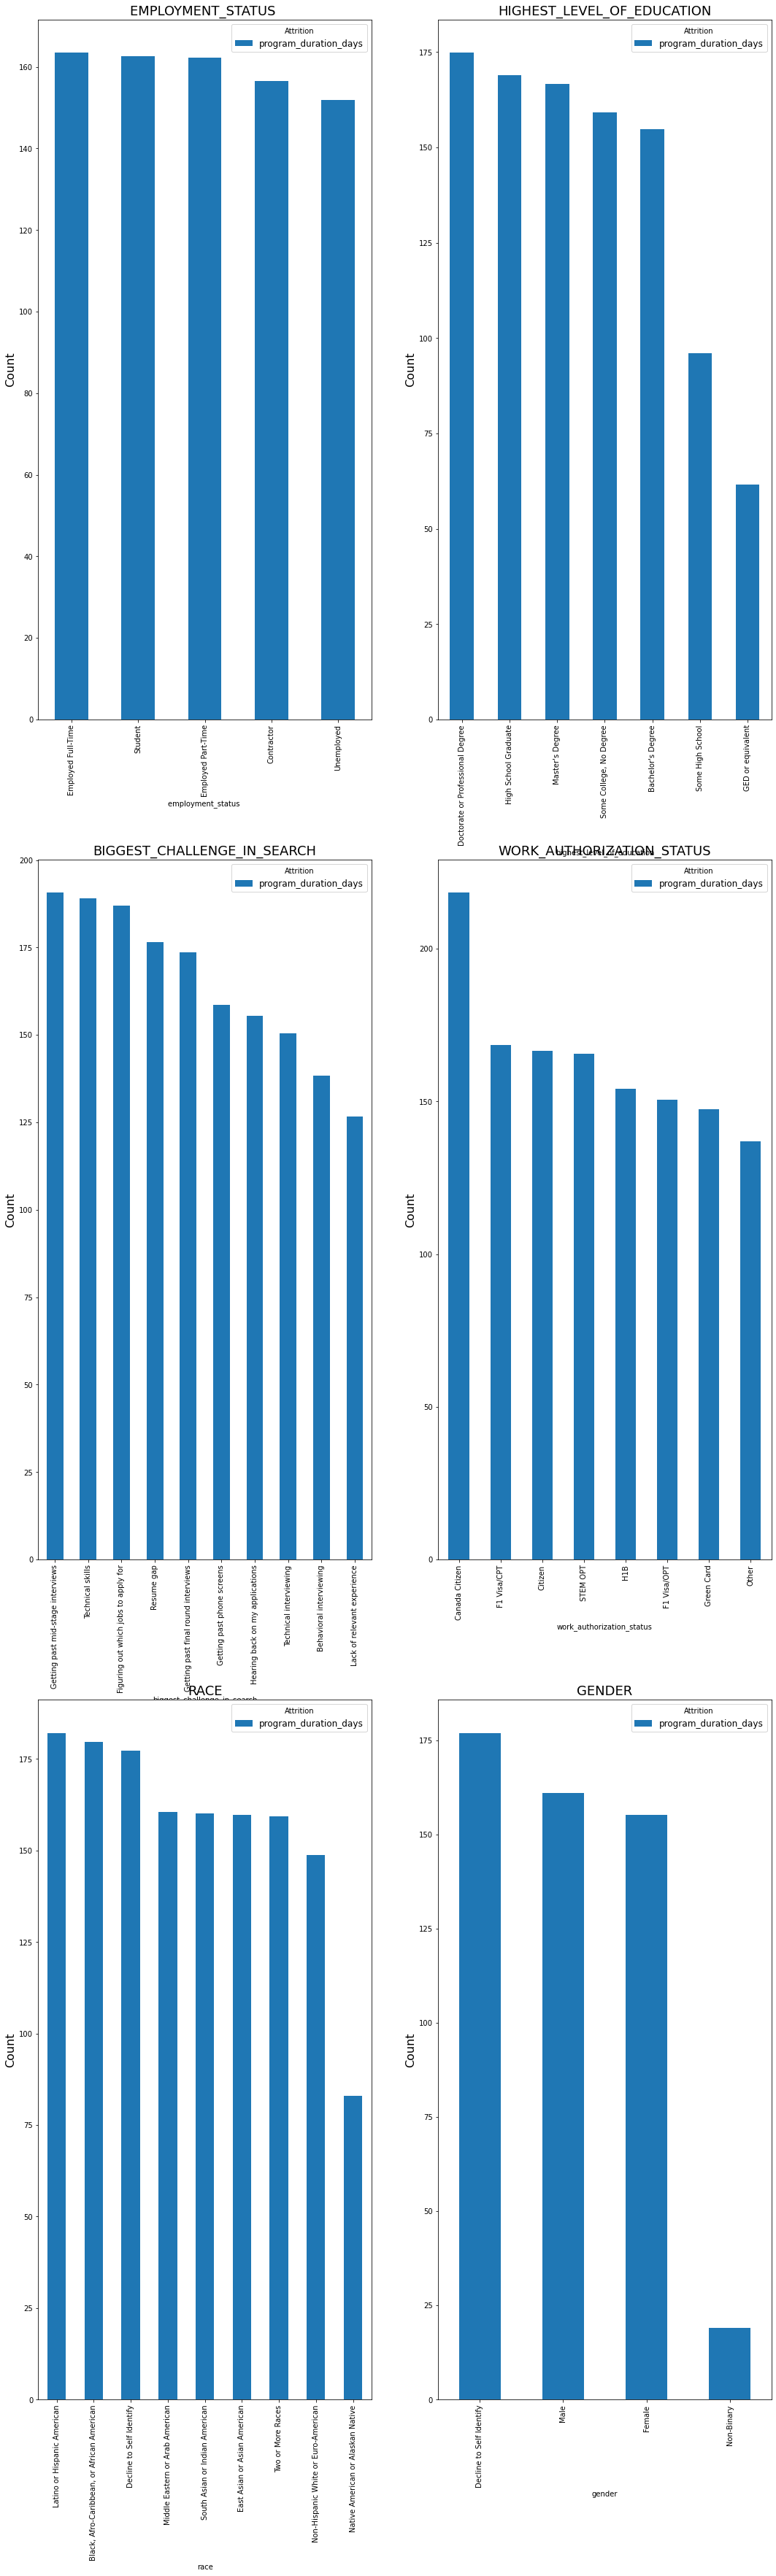

In [63]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,60))
#fig.subplots_adjust(hspace=0.5, bottom=0)
# Categorical features
cat_cols = ['employment_status ','highest_level_of_education', 'biggest_challenge_in_search', 
           'work_authorization_status', 'race', 'gender']


for ax, catplot in zip(axes.flatten(), cat_cols):
    df_loc = df_1.groupby(catplot).agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False) 
    df_loc.plot(kind='bar',figsize=(18,60), ax=ax,)
    ax.set_title(catplot.upper(), fontsize=18)
    ax.set_ylabel('Count', fontsize=16)
    #ax.set_xlabel(f'{catplot} Values', fontsize=15)
    ax.legend(title='Attrition', fontsize=12)


# Need to add description

### Understanding Quantatitive Columns wrt Placement Days

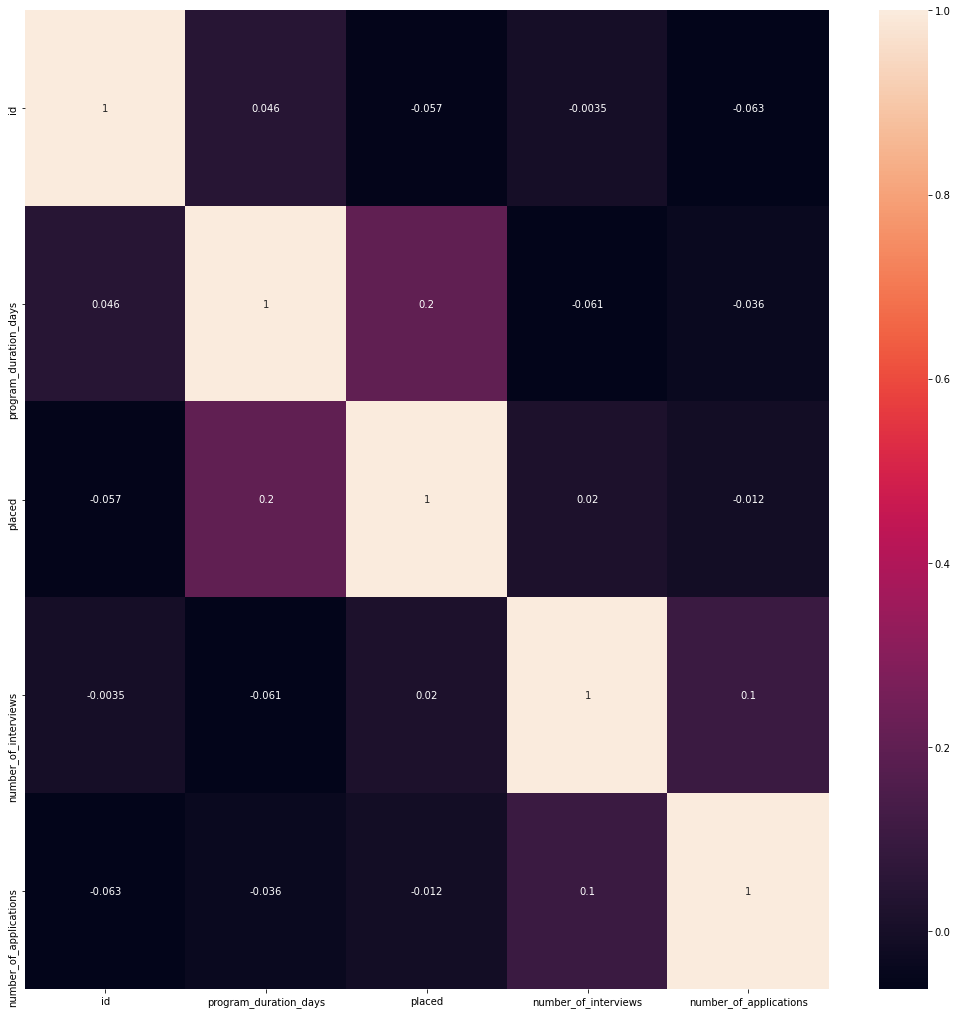

In [62]:
plt.figure(figsize=(18,18))
c= df.corr()
sns.heatmap(c,annot=True)
plt.show()

Using correlation matrix we are unable to see any column with a strong relationship with program_duration_days.
